<a href="https://colab.research.google.com/github/kaystg/L-Layer-Neural-Network-without-TensorFlow/blob/main/L_Layer_Neural_Network(Without_Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
def model():
  initialize_parameters()
  for i in range(0,iterations):
    forward_propagation()
    cost_function()
    backward_propagation()
    update_propagation()

In [3]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X_train=np.loadtxt('/content/cat_train_x.csv',delimiter=',')/255.0
Y_train=np.loadtxt('/content/cat_train_y.csv',delimiter=',').reshape(1,X_train.shape[1])
X_test=np.loadtxt('/content/cat_test_x.csv',delimiter=',')/255.0
Y_test=np.loadtxt('/content/cat_test_y.csv',delimiter=',').reshape(1,X_test.shape[1])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


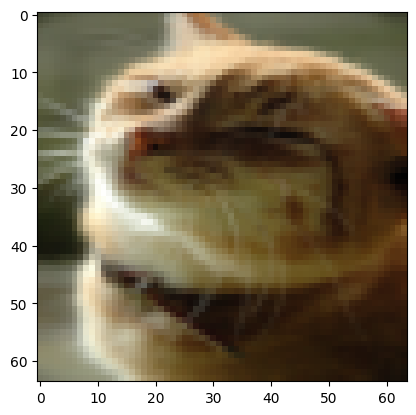

In [5]:
index=random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(64,64,3))
plt.show()

In [6]:
def sigmoid(Z):
  A=1/(1+np.exp(-Z))
  return A
def softmax(Z):
  expZ=np.exp(Z)
  return expZ/(np.sum(expZ,0))
def relu(Z):
  A=np.maximum(0,Z)
  return A
def tanh(Z):
  return np.tanh(Z)
def derivative_tanh(Z):
  return (1-np.power(Z,2))
def derivative_relu(Z):
  return np.array(Z>0,dtype='float')

In [7]:
def initialize_parameters(layer_dims):
  L=len(layer_dims)-1
  parameters={}
  for l in range(1,L+1):
    parameters["W"+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])/np.sqrt(layer_dims[l-1])
    parameters["b"+str(l)]=np.zeros((layer_dims[l],1))
  return parameters
p=initialize_parameters([10,100,200,1])

In [8]:
p

{'W1': array([[-8.03301958e-02,  3.24569923e-01,  6.40327597e-01,
         -7.10705660e-01, -3.61903829e-01, -4.22768860e-01,
          1.66894585e-01,  1.74190286e-01,  6.81427087e-02,
          5.24704959e-01],
        [-3.24279110e-01,  4.59996288e-01, -3.86464586e-01,
         -2.09960230e-01, -4.96528908e-01,  9.25213999e-02,
         -1.94784996e-01, -2.10976368e-01, -9.54522279e-01,
          8.54592785e-02],
        [ 7.83547317e-02, -4.07822451e-02, -1.04697911e-01,
          5.77704783e-02,  5.34445187e-02,  3.18899388e-01,
          3.15318147e-01, -2.23818307e-01, -2.67382637e-01,
          1.00619709e-01],
        [-3.41614352e-01,  5.31549824e-01, -1.87946581e-01,
          7.65354940e-03,  1.47988986e-01,  4.82770887e-02,
          2.33639972e-01,  2.66081763e-01, -4.57797232e-01,
         -1.42829421e-01],
        [-1.69349759e-01, -1.77563622e-01,  1.20701951e-01,
         -2.52128772e-01,  2.04864157e-01,  1.73194026e-01,
          1.78244558e-01, -4.02271414e-01, -3.

In [9]:
 layer_dims=[X_train.shape[0],100,200,Y_train.shape[0]]
 params=initialize_parameters(layer_dims)
 for l in range(1,len(layer_dims)):
  print("Shape of W"+str(l)+":",params['W'+str(l)].shape)
  print("SHape of b"+str(l)+":",params['b'+str(l)].shape,"\n")

Shape of W1: (100, 12288)
SHape of b1: (100, 1) 

Shape of W2: (200, 100)
SHape of b2: (200, 1) 

Shape of W3: (1, 200)
SHape of b3: (1, 1) 



In [10]:
def forward_propagation(X,parameters,activation='relu'):
  forward_cache={}
  L=len(parameters)//2
  forward_cache["A0"]=X
  for l in range(1,L):
    forward_cache["Z"+str(l)]=parameters["W"+str(l)].dot(forward_cache["A"+str(l-1)])+parameters["b"+str(l)]
    if activation=='relu':
      forward_cache["A"+str(l)]=relu(forward_cache["Z"+str(l)])
    else:
      forward_cache["A"+str(l)]=tanh(forward_cache["Z"+str(l)])
  forward_cache["Z"+str(L)]=parameters["W"+str(L)].dot(forward_cache["A"+str(L-1)])+parameters['b'+str(L)]
  if forward_cache['Z'+str(L)].shape[0]==1:
    forward_cache['A'+str(L)]=sigmoid(forward_cache["Z"+str(L)])
  else:
    forward_cache['A'+str(L)]=softmax(forward_cache["Z"+str(L)])
  return forward_cache['A'+str(L)],forward_cache

In [11]:
al,forw_cache=forward_propagation(X_train,params,'relu')
L=len(params)//2
for l in range(L+1):
  print("Shape of A"+str(l),forw_cache["A"+str(l)].shape)


Shape of A0 (12288, 209)
Shape of A1 (100, 209)
Shape of A2 (200, 209)
Shape of A3 (1, 209)


In [27]:
def compute_cost(AL,Y):
  #cost function depends on the actual label AL and Y.
  m=Y.shape[1]
  if Y.shape[0]==1:
    cost=-(1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
  else:
    cost=-(1/m)*np.sum(Y*np.log(AL))
  cost=np.squeeze(cost)
  return cost



In [29]:
def backward_propagation(AL,Y,parameters,forward_cache,activation):
  grads={}
  L=len(parameters)//2
  m=Y.shape[1]
  grads["dZ"+str(L)]=AL-Y
  grads["dW"+str(L)]=(1/m)*np.dot(grads["dZ"+str(L)],forward_cache["A"+str(L-1)].T)
  grads["db"+str(L)]=(1/m)*np.sum(grads["dZ"+str(L)],axis=1,keepdims=True)
  for l in reversed(range(1,L)):
    if activation=='relu':
      grads["dZ"+str(l)]=np.dot(parameters["W"+str(l+1)].T,grads["dZ"+str(l+1)])*derivative_relu(forward_cache["A"+str(l)])
    else:
      grads["dZ"+str(l)]=np.dot(parameters["W"+str(l+1)].T,grads["dZ"+str(l+1)])*derivative_tanh(forward_cache["A"+str(l)])
    grads["dW"+str(l)]=(1/m)*np.dot(grads["dZ"+str(l)],forward_cache["A"+str(l-1)].T)
    grads["db"+str(l)]=(1/m)*np.sum(grads["dZ"+str(l)],axis=1,keepdims=True)
  return grads

In [30]:
grads=backward_propagation(forw_cache["A"+str(3)],Y_train,params,forw_cache,'relu')
for l in reversed(range(1,len(grads)//3 + 1)):
  print("Shape of dZ"+str(l)+":",grads["dZ"+str(l)].shape)
  print("Shape of dW"+str(l)+":",grads["dW"+str(l)].shape)
  print("Shape of dB"+str(l)+":",grads["db"+str(l)].shape,"\n")

Shape of dZ3: (1, 209)
Shape of dW3: (1, 200)
Shape of dB3: (1, 1) 

Shape of dZ2: (200, 209)
Shape of dW2: (200, 100)
Shape of dB2: (200, 1) 

Shape of dZ1: (100, 209)
Shape of dW1: (100, 12288)
Shape of dB1: (100, 1) 



In [31]:
def update_parameters(parameters,grads,learning_rate):
  L=len(parameters)//2
  for l in range(1,L+1):
    parameters["W"+str(l)]=parameters["W"+str(l)]-learning_rate*grads["dW"+str(l)]
    parameters["b"+str(l)]=parameters["b"+str(l)]-learning_rate*grads["db"+str(l)]
  return parameters

In [46]:
def accuracy(X,Y,parameters,activation):
  m=Y.shape[1]
  preds,_=forward_propagation(X,parameters,activation)
  if Y.shape[0]==1:
    preds=np.array(preds>0.5,dtype='float')
  else:
    Y=np.argmax(Y,0)
    preds=np.argmax(preds,axis=0)
  return np.round(np.sum(Y==preds)/m,2)

In [49]:
def model(X,Y,layer_dims,learning_rate,activation="relu",num_iteration=100):
  parameters=initialize_parameters(layer_dims)
  for i in range(0,num_iteration):
    AL,forward_cache=forward_propagation(X,parameters,activation='relu')
    cost=compute_cost(AL,Y)
    grads=backward_propagation(AL,Y,parameters,forward_cache,activation)
    parameters=update_parameters(parameters,grads,learning_rate)
    if i%(num_iteration/10)==0:
      print("\nIter: {} \t Cost: {} \t Train_acc: {} \t Test_acc: {}".format(i,cost,accuracy(X_train,Y_train,parameters,activation),accuracy(X_test,Y_test,parameters,activation)))
  return parameters

In [50]:
layer_dims=[X_train.shape[0],20,10,Y_train.shape[0]]
lr=0.0075
iters=1000
parameters=model(X_train,Y_train,layer_dims,learning_rate=lr,activation='relu',num_iteration=iters)


Iter: 0 	 Cost: 0.6831378329490735 	 Train_acc: 0.66 	 Test_acc: 0.34

Iter: 100 	 Cost: 0.5382734093572794 	 Train_acc: 0.67 	 Test_acc: 0.4

Iter: 200 	 Cost: 0.4645490765554135 	 Train_acc: 0.71 	 Test_acc: 0.4

Iter: 300 	 Cost: 0.40387111809537707 	 Train_acc: 0.76 	 Test_acc: 0.44

Iter: 400 	 Cost: 0.35451477171976403 	 Train_acc: 0.78 	 Test_acc: 0.48

Iter: 500 	 Cost: 0.3014510105851166 	 Train_acc: 0.83 	 Test_acc: 0.48

Iter: 600 	 Cost: 0.21475678963024022 	 Train_acc: 0.93 	 Test_acc: 0.64

Iter: 700 	 Cost: 0.16851558258883484 	 Train_acc: 0.95 	 Test_acc: 0.68

Iter: 800 	 Cost: 0.12787698207414264 	 Train_acc: 0.97 	 Test_acc: 0.66

Iter: 900 	 Cost: 0.07730466123614448 	 Train_acc: 1.0 	 Test_acc: 0.7
